# First, an overview of what a single panel of visits looks like

In [2]:
import pandas as pd
import numpy as np
import os

os.chdir("/Users/burke/Documents/research/scrooge")

oneDocscreeningServices = pd.read_excel("SingleProvider10YearLifetimeScreeningServices.xlsx")
oneDocscreeningServices['year'] = oneDocscreeningServices.visitDate.dt.year
oneDocscreeningServices['timeWithSDM'] = oneDocscreeningServices.timeSpent + 5.2

oneDocPanel = pd.read_excel("SingleProvider10YearPanel.xlsx")
oneDocVisits = pd.read_excel("SingleProvider10YearLifetimeVisits.xlsx")
oneDocVisits['year'] = oneDocVisits.visitDate.dt.year

lastYearScreening = oneDocscreeningServices[oneDocscreeningServices.year==2026]


lastYearVisits = oneDocVisits[oneDocVisits.year==2026]

In [3]:
print len(lastYearVisits)
print len(lastYearScreening)
print lastYearScreening['timeSpent'].sum()

3712
8525
18279.0


In [4]:
lastYearScreening.head(5)

,Service,grade,localPatientID,screeningIndex,timeSpent,visitDate,year,timeWithSDM
0,Skin Cancer Prevention: Behavioral Counseling,B,19818,6,1.50,2026-01-01 21:15:11.423,2026,6.70
1,Sexually Transmitted Infections: Behavioral Co...,B,19818,8,3.00,2026-01-01 21:15:11.423,2026,8.20
2,Intimate Partner Violence: Screening,B,19818,20,1.00,2026-01-01 21:15:11.423,2026,6.20
3,Human Immunodeficiency Virus (HIV) Infection: ...,A,19818,21,1.00,2026-01-01 21:15:11.423,2026,6.20
4,High Blood Pressure in Adults: Screening,A,19818,23,0.25,2026-01-01 21:15:11.423,2026,5.45


## Table 1 — Summary of Screening Services with and without SDM (Need some 95% CIs)

In [5]:
lastYearScreening.groupby("Service").agg({'timeSpent' : lambda x : np.sum(x)/60, 'timeWithSDM' :lambda x : np.sum(x)/60 }).sort_values('timeSpent', ascending=False).style.format("{:4.2f}")

,timeWithSDM,timeSpent
Service,,
Healthful Diet and Physical Activity for Cardiovascular Disease Prevention in Adults Without Known Risk Factors: Behavioral Counseling,102.95,72.18
Healthful Diet and Physical Activity for Cardiovascular Disease Prevention in Adults With Cardiovascular Risk Factors: Behavioral Counseling,95.41,66.90
Abnormal Blood Glucose and Type 2 Diabetes Mellitus: Screening,65.54,45.95
Alcohol Misuse: Screening and Behavioral Counseling Interventions in Primary Care,33.49,16.42
Skin Cancer Prevention: Behavioral Counseling,51.59,11.55
Intimate Partner Violence: Screening,70.16,11.32
Colorectal Cancer: Screening,44.12,7.12
Human Immunodeficiency Virus (HIV) Infection: Screening One Tie,42.68,6.88
Statin Use for the Primary Prevention of Cardiovascular Disease in Adults: Preventive Medication,18.87,6.12


## Data Point  2 — Total time on screening services under different conditions

### Overall Times in Base Case (time in minutes)

In [58]:
lastYearScreening.agg({'timeSpent':np.sum, 'timeWithSDM' : np.sum})

timeWithSDM    62609.0
timeSpent      18279.0
dtype: float64

### Excluding Level C Screening (time in hours)

In [59]:
noLevelC = lastYearScreening.loc[lastYearScreening.grade != 'C']
noLevelC.agg({'timeSpent':np.sum, 'timeWithSDM' : np.sum})

timeWithSDM    52620.1
timeSpent      13136.5
dtype: float64

### Excluding Level B Screening

In [60]:
levelAOnly = lastYearScreening.loc[lastYearScreening.grade == 'A']
levelAOnly.agg({'timeSpent':np.sum, 'timeWithSDM' : np.sum})

timeWithSDM    11391.35
timeSpent       1599.75
dtype: float64

### What services are we talking about for Level A only...

In [61]:
levelAOnly.groupby("Service").agg({'timeSpent' : lambda x : np.sum(x)/60, 'timeWithSDM' :lambda x : np.sum(x)/60 }).sort_values('timeSpent', ascending=False).style.format("{:4.2f}")

,timeWithSDM,timeSpent
Service,,
Colorectal Cancer: Screening,44.12,7.12
Human Immunodeficiency Virus (HIV) Infection: Screening One Tie,42.68,6.88
Tobacco Smoking Cessation in Adults: Behavioral and Pharmacotherapy Interventions,15.44,5.65
Cervical Cancer: Screening,21.60,3.48
High Blood Pressure in Adults: Screening,61.68,2.83
Human Immunodeficiency Virus (HIV) Infection: Screening Annual,2.17,0.35
Syphilis Infection in Nonpregnant Adults and Adolescents: Screening,2.17,0.35




# Then, looking across 400 providers (will increase the estimate) to capture some variance

In [233]:
allScreeningServices = pd.read_csv("allScreenings.csv")
allScreeningServices.visitDate = pd.to_datetime(allScreeningServices.visitDate)

allScreeningServices['year'] = allScreeningServices.visitDate.dt.year
allScreeningServices['timeWithSDM'] = allScreeningServices.timeSpent + 5.2

allVisits = pd.read_csv("allVisits.csv")
allVisits.visitDate = pd.to_datetime(allVisits.visitDate)
allVisits['year'] = allVisits.visitDate.dt.year


lastYearAllScreening = allScreeningServices[allScreeningServices.year==2026]
lastYearAllVisits = allVisits[allVisits.year==2026]

allProviders = pd.read_csv("allProviders.csv")

# Total Time Needed for Prevention + SDM

### Total hours of screening and variation at the provider level with SDM

In [234]:
# note -  will convert all hours of yearly screening to hours of screeing per day by dividing by 
# 48 weeks * 5 days per week = 240
print (lastYearAllScreening.groupby('providerID')['timeWithSDM'].sum() / 60 / 240).describe()
meanTimeForCompleteScreeningPlusSDM = (lastYearAllScreening.groupby('providerID')['timeWithSDM'].sum() / 60 / 240).mean()

count    400.000000
mean       3.797402
std        0.786779
min        1.265424
25%        3.260305
50%        3.788752
75%        4.345497
max        6.153122
Name: timeWithSDM, dtype: float64


### Total hours of screening ande variation at the provider level without SDM

In [235]:
print (lastYearAllScreening.groupby('providerID')['timeSpent'].sum() / 60 / 240).describe()
meanTImeForCompleteScreeningMinusSDM = (lastYearAllScreening.groupby('providerID')['timeSpent'].sum() / 60 / 240).mean()

count    400.000000
mean       1.103902
std        0.228285
min        0.356507
25%        0.949602
50%        1.100398
75%        1.260938
max        1.807510
Name: timeSpent, dtype: float64


### Total iours of screening and vartiation at the provider level omitting level C screening

In [236]:
noLevelC = lastYearAllScreening.loc[lastYearAllScreening.grade != 'C']
print (noLevelC.groupby('providerID')['timeSpent'].sum() / 60 /240).describe()
print (noLevelC.groupby('providerID')['timeWithSDM'].sum() / 60 / 240).describe()

count    400.000000
mean       0.799102
std        0.165744
min        0.263021
25%        0.684314
50%        0.798849
75%        0.916965
max        1.301233
Name: timeSpent, dtype: float64
count    400.000000
mean       3.195440
std        0.662353
min        1.079854
25%        2.738302
50%        3.196462
75%        3.658668
max        5.162594
Name: timeWithSDM, dtype: float64


### Total hours of screening and variation at the provider level omitting level B and level C screening

In [237]:
levelAOnly = lastYearAllScreening.loc[lastYearAllScreening.grade == 'A']
print (levelAOnly.groupby('providerID')['timeSpent'].sum() / 60 / 240).describe()
print (levelAOnly.groupby('providerID')['timeWithSDM'].sum() / 60 / 240).describe()


count    400.000000
mean       0.098687
std        0.020599
min        0.033628
25%        0.084596
50%        0.097786
75%        0.112339
max        0.160660
Name: timeSpent, dtype: float64
count    400.000000
mean       0.691412
std        0.143854
min        0.234767
25%        0.593496
50%        0.686408
75%        0.788883
max        1.120493
Name: timeWithSDM, dtype: float64


In [238]:
levelAWithSDM = (levelAOnly.groupby('providerID')['timeWithSDM'].sum() / 60 / 240).mean()
levelAWithoutSDM = (levelAOnly.groupby('providerID')['timeSpent'].sum() / 60 / 240).mean()

levelBOnly = lastYearAllScreening.loc[lastYearAllScreening.grade == 'B']
levelBWithSDM = (levelBOnly.groupby('providerID')['timeWithSDM'].sum() / 60 / 240).mean()
levelBWithoutSDM = (levelBOnly.groupby('providerID')['timeSpent'].sum() / 60 / 240).mean()

levelCOnly = lastYearAllScreening.loc[lastYearAllScreening.grade == 'C']
levelCWithSDM = (levelCOnly.groupby('providerID')['timeWithSDM'].sum() / 60 / 240).mean()
levelCWithoutSDM = (levelCOnly.groupby('providerID')['timeSpent'].sum() / 60 / 240).mean()

# Total Time available for Prevention

In [239]:
allProviders['totalClinicalTime'] = allProviders.hoursWorked * allProviders.proportionClinical
allProviders['totalTimePerDay'] = allProviders.hoursWorked / 240
allProviders['fractionPreventive'] = np.random.normal(.168, .04, len(allProviders))
allProviders['fractionPreventivePlusDoc'] = allProviders.fractionPreventive + allProviders.fractionPreventive * np.random.normal(.385, 0.02, len(allProviders))
# for now, our time available for prevention will not include documentation time
allProviders['timeAvailableForPreventionPerYear'] = allProviders.fractionPreventive * allProviders.totalClinicalTime
allProviders['timeAvailableForPreventionPerDay'] = allProviders.timeAvailableForPreventionPerYear / 240
allProviders['totalClinicalTimePerDay'] = allProviders.totalClinicalTime / 240
allProviders['totalNonClinicalTimePerDay'] = allProviders.hoursWorked * (1-allProviders.proportionClinical) / 240
allProviders['totalClincalNonPreventionTimePerDay'] = allProviders.totalClinicalTimePerDay- allProviders.timeAvailableForPreventionPerDay

In [240]:
allProviders.timeAvailableForPreventionPerDay.describe()

count    400.000000
mean       0.472245
std        0.138204
min        0.182454
25%        0.376645
50%        0.466239
75%        0.550189
max        0.938797
Name: timeAvailableForPreventionPerDay, dtype: float64

In [241]:
print allProviders.totalTimePerDay.mean()
print allProviders.totalClinicalTimePerDay.mean()
print allProviders.totalNonClinicalTimePerDay.mean()
print allProviders.totalClincalNonPreventionTimePerDay.mean()
print allProviders.timeAvailableForPreventionPerDay.mean()

10.6040220653
2.8605820071
7.74344005824
2.38833695601
0.472245051084


10.6040220653
0.139909326295


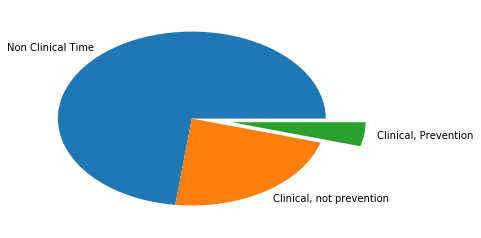

In [242]:
%matplotlib inline
import matplotlib.pyplot as plt

totalTimePerDay = allProviders.totalNonClinicalTimePerDay.mean() +  allProviders.totalClincalNonPreventionTimePerDay.mean() + allProviders.timeAvailableForPreventionPerDay.mean()
print totalTimePerDay

plt.pie([allProviders.totalNonClinicalTimePerDay.mean(), allProviders.totalClincalNonPreventionTimePerDay.mean(), 
        allProviders.timeAvailableForPreventionPerDay.mean()], 
        labels=['Non Clinical Time', 'Clinical, not prevention', 'Clinical, Prevention'], explode = [0,0,.3])

timeAvailableForPreventionArea = 3.141592653589 * allProviders.timeAvailableForPreventionPerDay.mean()/totalTimePerDay
print timeAvailableForPreventionArea

[0.6914121354166725, 1.6684035763889684, 0.6019628298611068]
[0.23344491 0.56331139 0.2032437 ]
[0.09868706597222227, 0.6271144097222219, 0.3047999826388873]
[0.09575677 0.60849362 0.29574961]


([<matplotlib.patches.Wedge at 0x18abb4410>,
 [Text(0.150247,0.358056,'A'),
  Text(-0.376766,-0.0939473,'B'),
  Text(0.387683,-0.021912,'C')])

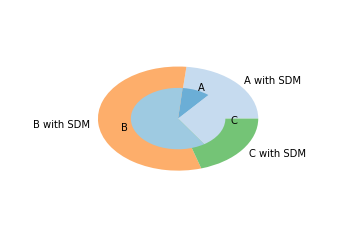

In [243]:
areaOfOuterCircle = timeAvailableForPreventionArea * meanTimeForCompleteScreeningPlusSDM / allProviders.timeAvailableForPreventionPerDay.mean()
radiusOfOuterCircle = np.sqrt(areaOfOuterCircle / 3.141592653589)

areaOfInnerCircle = areaOfOuterCircle * (levelAWithoutSDM + levelBWithoutSDM + levelCWithoutSDM) / (levelAWithSDM + levelBWithSDM + levelCWithSDM)
radiusOfInnerCircle = np.sqrt(areaOfInnerCircle  / 3.141592653589)


fig, ax = plt.subplots()
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([3,6,9]))
inner_colors = cmap(np.array([1, 2, 3]))

print [levelAWithSDM, levelBWithSDM, levelCWithSDM]
totalWithoutSDM = np.array([levelAWithSDM, levelBWithSDM, levelCWithSDM]).sum()
print [levelAWithSDM, levelBWithSDM, levelCWithSDM]/ totalWithoutSDM
print [levelAWithoutSDM, levelBWithoutSDM, levelCWithoutSDM]
totalWithSDM = np.array([levelAWithoutSDM, levelBWithoutSDM, levelCWithoutSDM]).sum()
print [levelAWithoutSDM, levelBWithoutSDM, levelCWithoutSDM] / totalWithSDM

ax.pie([levelAWithSDM, levelBWithSDM, levelCWithSDM], labels=['A with SDM', 'B with SDM', 'C with SDM'], radius=radiusOfOuterCircle,
      colors=outer_colors)
ax.pie([levelAWithoutSDM, levelBWithoutSDM, levelCWithoutSDM], radius=radiusOfInnerCircle, 
       startangle=50, colors=inner_colors, labels=['A','B','C'])


## Negative/Positive prevention Time

In [244]:
dailyTimeForAllScreeningAndSDM = (lastYearAllScreening.groupby("providerID")['timeWithSDM'].sum() / 240 / 60)
dailyTimeForAllScreeningAndSDM.rename("dailyTimeForAllScreeningAndSDM", inplace=True)
allProviders = allProviders.join(dailyTimeForAllScreeningAndSDM, on='providerID')

dailyTimeForAllScreeningAndNoSDM = (lastYearAllScreening.groupby("providerID")['timeSpent'].sum() / 240 / 60)
dailyTimeForAllScreeningAndNoSDM.rename("dailyTimeForAllScreeningAndNoSDM", inplace=True)
allProviders = allProviders.join(dailyTimeForAllScreeningAndNoSDM, on='providerID')

dailyTimeForABScreeningAndSDM = (noLevelC.groupby("providerID")['timeWithSDM'].sum() / 240 / 60)
dailyTimeForABScreeningAndSDM.rename("dailyTimeForABScreeningAndSDM", inplace=True)
allProviders = allProviders.join(dailyTimeForABScreeningAndSDM, on='providerID')

dailyTimeForABScreeningAndNoSDM = (noLevelC.groupby("providerID")['timeSpent'].sum() / 240 / 60)
dailyTimeForABScreeningAndNoSDM.rename("dailyTimeForABScreeningAndNoSDM", inplace=True)
allProviders = allProviders.join(dailyTimeForABScreeningAndNoSDM, on='providerID')

dailyTimeForAScreeningAndSDM = (levelAOnly.groupby("providerID")['timeWithSDM'].sum() / 240 / 60)
dailyTimeForAScreeningAndSDM.rename("dailyTimeForAScreeningAndSDM", inplace=True)
allProviders =  allProviders.join(dailyTimeForAScreeningAndSDM, on='providerID')

dailyTimeForAScreeningAndNoSDM = (levelAOnly.groupby("providerID")['timeSpent'].sum() / 240 / 60)
dailyTimeForAScreeningAndNoSDM.rename("dailyTimeForAScreeningAndNoSDM", inplace=True)
allProviders =  allProviders.join(dailyTimeForAScreeningAndNoSDM, on='providerID')

dailyTimeForNoScreening = allProviders.totalTimePerDay - allProviders.timeAvailableForPreventionPerDay
dailyTimeForNoScreening.rename("dailyTimeForNoScreening", inplace=True)
allProviders =  allProviders.join(dailyTimeForNoScreening, on='providerID')

In [245]:
netTimeAllServicesWithSDM = allProviders.timeAvailableForPreventionPerDay - allProviders.dailyTimeForAllScreeningAndSDM
netTimeAllServicesNoSDM = allProviders.timeAvailableForPreventionPerDay - allProviders.dailyTimeForAllScreeningAndNoSDM

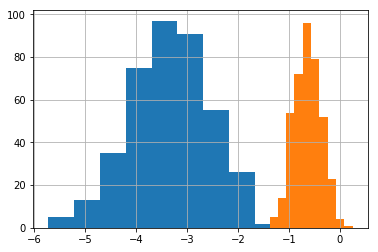

In [246]:
netTimeAllServicesWithSDM.hist()
netTimeAllServicesNoSDM.hist()

#### What % of providres are under water on time with and without SDM

In [247]:
print (netTimeAllServicesWithSDM >0).sum() / float(len(netTimeAllServicesWithSDM))
print (netTimeAllServicesNoSDM > 0).sum() / float(len(netTimeAllServicesNoSDM))

0.0
0.0075


#### Net time, exclude level C

0.0
0.0725


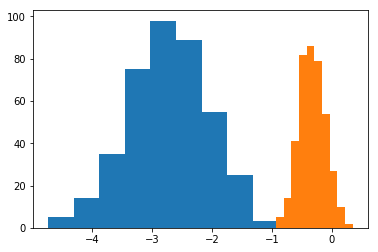

In [248]:
netTimeNoLevelCWithSDM= allProviders.timeAvailableForPreventionPerDay - allProviders.dailyTimeForABScreeningAndSDM
netTimeNoLevelCNoSDM = allProviders.timeAvailableForPreventionPerDay - allProviders.dailyTimeForABScreeningAndNoSDM

plt.hist(netTimeNoLevelCWithSDM.dropna())
plt.hist(netTimeNoLevelCNoSDM.dropna())

print (netTimeNoLevelCWithSDM.dropna() >0).sum() / float(len(netTimeNoLevelCWithSDM.dropna()))
print (netTimeNoLevelCNoSDM.dropna() > 0).sum() / float(len(netTimeNoLevelCNoSDM.dropna()))

#### Net time, exclude level B amnd level C

0.145
1.0


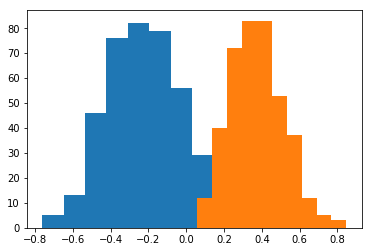

In [249]:
netTimeNoLevelBCWithSDM= allProviders.timeAvailableForPreventionPerDay - allProviders.dailyTimeForAScreeningAndSDM
netTimeNoLevelBCNoSDM = allProviders.timeAvailableForPreventionPerDay - allProviders.dailyTimeForAScreeningAndNoSDM

plt.hist(netTimeNoLevelBCWithSDM.dropna())
plt.hist(netTimeNoLevelBCNoSDM.dropna())

print (netTimeNoLevelBCWithSDM.dropna() >0).sum() / float(len(netTimeNoLevelBCWithSDM.dropna()))
print (netTimeNoLevelBCNoSDM.dropna() > 0).sum() / float(len(netTimeNoLevelBCNoSDM.dropna()))

Data from - Relationship Between Clerical Burden and
Characteristics of the Electronic Environment With
Physician Burnout and Professional Satisfaction

Going to solve for the logistic intercept implied by their OR on hours of work, using their mean burnout rate (55%) and the median number of hours worke (50) the Odds ratio per hour (1.02 is converted to a beta - .02469)

In [250]:
intercept = np.log(.553/(1-.553)) - 50 * 0.024692612590372
print intercept

-1.0218312226098338


In [251]:
allProviders['dailyTimeWithAllScreeningAndSDM'] = allProviders.dailyTimeForAllScreeningAndSDM + allProviders.dailyTimeForNoScreening
allProviders['dailyTimeWithABScreeningAndSDM'] = allProviders.dailyTimeForABScreeningAndSDM + allProviders.dailyTimeForNoScreening
allProviders['dailyTimeWithAScreeningAndSDM'] = allProviders.dailyTimeForAScreeningAndSDM + allProviders.dailyTimeForNoScreening
allProviders['dailyTimeWithAllScreeningAndNoSDM'] = allProviders.dailyTimeForAllScreeningAndNoSDM + allProviders.dailyTimeForNoScreening
allProviders['dailyTimeWithABScreeningAndNoSDM'] = allProviders.dailyTimeForABScreeningAndNoSDM + allProviders.dailyTimeForNoScreening
allProviders['dailyTimeWithAScreeningAndNoSDM'] = allProviders.dailyTimeForAScreeningAndNoSDM + allProviders.dailyTimeForNoScreening

(array([ 3., 16., 35., 64., 89., 82., 55., 30., 16.,  9.]),
 array([26.45093811, 31.31207184, 36.17320556, 41.03433929, 45.89547301,
        50.75660674, 55.61774046, 60.47887419, 65.34000791, 70.20114164,
        75.06227536]),
 <a list of 10 Patch objects>)

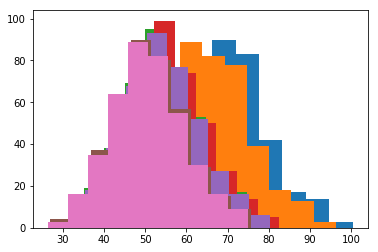

In [252]:
plt.hist(allProviders.dailyTimeWithAllScreeningAndSDM.dropna() * 5)
plt.hist(allProviders.dailyTimeWithABScreeningAndSDM.dropna() * 5)
plt.hist(allProviders.dailyTimeWithAScreeningAndSDM.dropna() * 5)
plt.hist(allProviders.dailyTimeWithAllScreeningAndNoSDM.dropna() * 5)
plt.hist(allProviders.dailyTimeWithABScreeningAndNoSDM.dropna() * 5)
plt.hist(allProviders.dailyTimeWithAScreeningAndNoSDM.dropna() * 5)
plt.hist(allProviders.dailyTimeForNoScreening.dropna() * 5)

In [265]:
allProviders['burnOutFullScreeningWithSDMXB'] = intercept + allProviders.dailyTimeWithAllScreeningAndSDM * 5 *  0.024692612590372
allProviders['probBurnOutFullScreeningWithSDM'] = np.exp(allProviders.burnOutFullScreeningWithSDMXB) / (1 + np.exp(allProviders.burnOutFullScreeningWithSDMXB))

allProviders['burnOutWithABScreeningAndSDMXB'] = intercept + allProviders.dailyTimeWithABScreeningAndSDM * 5 *  0.024692612590372
allProviders['probBurnOutABScreeningWithSDM'] = np.exp(allProviders.burnOutWithABScreeningAndSDMXB) / (1 + np.exp(allProviders.burnOutWithABScreeningAndSDMXB))

allProviders['burnOutWithAScreeningAndSDMXB'] = intercept + allProviders.dailyTimeWithAScreeningAndSDM * 5 *  0.024692612590372
allProviders['probBurnOutAScreeningWithSDM'] = np.exp(allProviders.burnOutWithAScreeningAndSDMXB) / (1 + np.exp(allProviders.burnOutWithAScreeningAndSDMXB))

allProviders['burnOutWithFullScreeningAndNoSDMXB'] = intercept + allProviders.dailyTimeWithAllScreeningAndNoSDM * 5 *  0.024692612590372
allProviders['probBurnOutFullScreeningAndNoSDM'] = np.exp(allProviders.burnOutWithFullScreeningAndNoSDMXB) / (1 + np.exp(allProviders.burnOutWithFullScreeningAndNoSDMXB))

allProviders['burnOutWithABScreeningAndNoSDMXB'] = intercept + allProviders.dailyTimeWithABScreeningAndNoSDM * 5 *  0.024692612590372
allProviders['probBurnOutABScreeningAndNoSDM'] = np.exp(allProviders.burnOutWithABScreeningAndNoSDMXB) / (1 + np.exp(allProviders.burnOutWithABScreeningAndNoSDMXB))

allProviders['burnOutWithAScreeningAndNoSDMXB'] = intercept + allProviders.dailyTimeWithAScreeningAndNoSDM * 5 *  0.024692612590372
allProviders['probBurnOutAScreeningAndNoSDM'] = np.exp(allProviders.burnOutWithAScreeningAndNoSDMXB) / (1 + np.exp(allProviders.burnOutWithAScreeningAndNoSDMXB))

allProviders['burnOutWithNoScreenXB'] = intercept + allProviders.dailyTimeForNoScreening * 5 *  0.024692612590372
allProviders['probBurnOutWithNoScreen'] = np.exp(allProviders.burnOutWithNoScreenXB) / (1 + np.exp(allProviders.burnOutWithNoScreenXB))


In [266]:
print allProviders.probBurnOutFullScreeningWithSDM.mean()
print allProviders.probBurnOutABScreeningWithSDM.mean()
print allProviders.probBurnOutAScreeningWithSDM.mean()
print allProviders.probBurnOutFullScreeningAndNoSDM.mean()
print allProviders.probBurnOutABScreeningAndNoSDM.mean()
print allProviders.probBurnOutAScreeningAndNoSDM.mean()
print allProviders.probBurnOutWithNoScreen.mean()

0.665422872183
0.649006205594
0.576951008295
0.589165356413
0.58015062567
0.559228172948
0.556260481991
